# <font size="5">STEP 1: YAML CONFIG FILE

In [637]:
import yaml
import os
yaml_file_path='C:\\AI\\FRAUD_DETECTION\\ML\\INI\\config.yaml'
with open (yaml_file_path) as file:
        config=yaml.safe_load(file)

In [638]:
train_data_path = config . get('train_data_path')
test_data_path  = config . get ("test_data_path")
answer  = config . get ("answer")
ans_data  = config . get ("ans_data")
payer_data  = config . get ("payer_data")
charts  = config . get ("charts")

# <font size="5">STEP 2: IMPORTING REQUIRED LIBRARIES

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import math
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from scipy.stats import sem, t
from scipy import mean
import scipy.stats as stats
import scipy
import warnings
warnings.filterwarnings('ignore')
#from __future__ import division

# <font size="5">STEP 3: IMPORTING TRAIN AND TEST DATA

In [708]:
input_data=pd.read_csv(train_data_path) 
test_data =pd.read_csv(test_data_path)

In [863]:
input_data.head()

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,DISCHARGE_DATETIME,CLAIM_DATE,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD
0,ZERIC121,1202Sara,2,7,0,1,30000,LL3379,Male,HEALTH2910,...,28-12-2019 3.29,10-01-2020 3.29,30000,18,54906,9,0,3,PKO1,0
1,XHO121,1395Sada,2,7,0,1,30000,LL3401,Male,HEALTH2918,...,11-09-2019 19.57,27-09-2019 19.57,30000,28,58098,12,0,4,PKO1,0
2,DHARMA121,1822Varm,13,0,2,1,6000,LL3081,Female,HEALTH2167,...,30-05-2019 4.07,09-06-2019 4.07,6000,13,55009,8,2,3,GS07,0
3,XHO121,1430Hars,2,7,0,1,30000,LL3574,Female,HEALTH2820,...,29-09-2019 7.49,12-10-2019 7.49,30000,5,59217,2,7,4,PKO1,1
4,HEALTHY121,1106Anag,2,7,0,1,30000,LL3948,Female,HEALTH2970,...,25-08-2019 4.01,10-11-2019 4.01,30000,35,51464,9,0,2,PKO1,1


In [864]:
Disease_dic  ={"Malaria":{"High fever,Chills,Headache,Vomiting,Sweat": "Artemisinin based combination therapies(ACTs)"},
            "Hepatitis B":{"High fever,Constant pain in stomach,Loss of appetite,nausea,vomiting,Jaundice,Tiredness,Diarrhoea":"Tenofovir"},
            "Herpes":{"Cold sores around the mouth,Lesions on the upper and lower lip,Red blisters on the skin,Fever":"acetaminophen"},
            "Insomnia":{"Sleeping trouble asthma,depression,cancer":"Eszopiclone"},
            "Autism":{"Hypersensitivity to noise,Lost in own thoughts,Hitting or biting themselves,Not using gestures while communicatingInability to follow objects visually":"Speech,Physical therapy"},
            "Kidney Stone":{"Sharp pain in the side, back and below the ribs,Pain that comes suddenly and then goes away,Pain or burning sensation on urination,Blood spot or pink, red or brown colour urine":"Sound waves"},
            "Leukemia":{"Dizziness,constant fatigue Fever,Weight loss,Tiny red spotting or rashes on skin":"Radiation therapy"},
            "Lung cancer":{"Consistent cough Blood in cough Shortness of breath Chest pain":"Surgical removal"},
            "Kawasaki Syndrome":{"Fever for four or more days,Swollen lymph nodes,Body rashes,Peeling of skin from hands,Redness in eyes,Cracked lips":"immunoglobulin"},
            "Nearsightedness":{"Blurry vision while looking at distant objects,Need to partially close or squint the eyes to see clearly,Frequent headaches caused due to eye strain,Difficulty while driving at night also called as night myopia":"Corrective lense"},
            "Osteoarthritis":{"Joint pain,swelling,andstiffness,Pain in joints after physical stress,Joint stiffness after resting":"Acetaminophen"},
            "Alzheimer":{"Memory lapses,Losing everyday items such as keys, eye glasses,Forgetting common words in a conversation,Losing way on familiar paths,Forgetting conversations":"Donepezil(Aricept),Rivastigmine(Exelon),Tacrine (Cognex)"},
            "Asthma":{"Tightness in the chest,Shortness of breath,Wheezing,Coughing and wheezing attack,Coughing at night":"SOS inhaler"},
            "Cholera":{"Diarrhoea and vomiting,often with a fishy odour,Increased heart rate,Loss of skin elasticity,Skin colour may turn bluish due to excessive fluid loss,Sunken eyes,Wrinkled hands":"Oral Rehydration Salts"},
            "Diphtheria":{"Chills,Fever,Swollen glands in the neck,Sore throat,Cough,Uneasiness and discomfort,Drooling,Difficulty in breathing":"antitoxin"},
            "Generalized Anxiety Disorder":{"Fatigue,Insomnia or trouble staying asleep,Body ache,Trembling,Nervousness,Sweating":"Benzodiazepines"},
            "Dengue":{"Haemorrhage (severe bleeding), blood plasma leakage, and an exceptionally low platelet count":"Acetaminophen"},
            "Migraine":{"Feeling nauseous and queasy,Discomfort in bright lights and loud sounds,Stiffness in neck":"ibuprofen"},
            "Polymyalgia rheumatica":{"Stiffness and pain around shoulders,Pain and inflexibility in the neck, upper arms, buttocks, hips or thighs,Aches and limited range of motion in your wrists, elbows or knees":"steroids"},
            "Ulcers":{"A burning, gnawing pain in the upper middle part of the abdomen and is relieved only by eating or taking an antacid":"cimetidine"}}

# <font size="5">STEP 3: CONVERTING INTO CATEGORICAL VALUES </font>

In [711]:
input_data["PROFESSION"] = input_data["PROFESSION"].astype('category')
input_data["ADDRESS"] = input_data["ADDRESS"].astype('category')
input_data["PAYER"] = input_data["PAYER"].astype('category')
input_data["MEDICATION"] = input_data["MEDICATION"].astype('category')
input_data["SYMPTOMS"] = input_data["SYMPTOMS"].astype('category')
input_data["CLAIMED_MEDICATION"] = input_data["CLAIMED_MEDICATION"].astype('category')
input_data["DISEASE"] = input_data["DISEASE"].astype('category')
input_data.dtypes

PROVIDER                 object
PATIENT_ID               object
DISEASE                category
SYMPTOMS               category
MEDICATION             category
CLAIM_NO                  int64
BILL_AMOUNT               int64
HEALTH_CARE_CARD_ID      object
GENDER                   object
INSURANCE_ID             object
JOIN_DATETIME            object
DISCHARGE_DATETIME       object
CLAIM_DATE               object
CLAIM_AMOUNT              int64
ADDRESS                category
ZIPCODE                   int64
PROFESSION             category
CLAIMED_MEDICATION     category
PAYER                  category
PHYSICIAN_ID             object
DETECT_FRAUD              int64
dtype: object

In [713]:
input_data["PROFESSION"] = input_data["PROFESSION"].cat.codes
input_data["ADDRESS"] = input_data["ADDRESS"].cat.codes
input_data["PAYER"] = input_data["PAYER"].cat.codes
input_data["MEDICATION"] = input_data["MEDICATION"].cat.codes
input_data["CLAIMED_MEDICATION"] = input_data["CLAIMED_MEDICATION"].cat.codes
input_data["SYMPTOMS"] = input_data["SYMPTOMS"].cat.codes
input_data["DISEASE"] = input_data["DISEASE"].cat.codes
input_data

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,DISCHARGE_DATETIME,CLAIM_DATE,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD
0,ZERIC121,1202Sara,2,7,0,1,30000,LL3379,Male,HEALTH2910,...,28-12-2019 3.29,10-01-2020 3.29,30000,18,54906,9,0,3,PKO1,0
1,XHO121,1395Sada,2,7,0,1,30000,LL3401,Male,HEALTH2918,...,11-09-2019 19.57,27-09-2019 19.57,30000,28,58098,12,0,4,PKO1,0
2,DHARMA121,1822Varm,13,0,2,1,6000,LL3081,Female,HEALTH2167,...,30-05-2019 4.07,09-06-2019 4.07,6000,13,55009,8,2,3,GS07,0
3,XHO121,1430Hars,2,7,0,1,30000,LL3574,Female,HEALTH2820,...,29-09-2019 7.49,12-10-2019 7.49,30000,5,59217,2,7,4,PKO1,1
4,HEALTHY121,1106Anag,2,7,0,1,30000,LL3948,Female,HEALTH2970,...,25-08-2019 4.01,10-11-2019 4.01,30000,35,51464,9,0,2,PKO1,1
5,ZERIC121,1585Gabo,13,0,2,1,6000,LL3681,Male,HEALTH2556,...,27-11-2019 10.46,14-12-2019 10.46,6000,11,53820,9,2,3,GS07,0
6,SSS121,1549Same,2,7,0,1,30000,LL3631,Female,HEALTH2044,...,25-11-2019 9.11,06-12-2019 9.11,30000,31,51722,4,0,4,PKO1,0
7,DHARMA121,1435Mall,2,7,0,1,30000,LL3588,Male,HEALTH2207,...,17-05-2020 7.19,06-06-2020 7.19,45000,22,52495,5,0,3,PKO1,1
8,XHO121,1374Shar,2,7,0,1,30000,LL3659,Male,HEALTH2703,...,06-05-2020 12.48,03-06-2020 12.48,30000,4,59285,4,0,4,PKO1,0
9,ZERIC121,1287Swar,2,7,0,1,30000,LL3499,Female,HEALTH2782,...,12-05-2020 16.48,23-05-2020 16.48,30000,38,57057,8,0,3,PKO1,0


In [742]:
train_data_features = input_data [['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']].values
train_data_label = input_data['DETECT_FRAUD'].values

In [743]:
model = LogisticRegression(random_state = 0)
model.fit(train_data_features,train_data_label)

LogisticRegression(random_state=0)

In [744]:
test_data["PROFESSION"] = test_data["PROFESSION"].astype('category')
test_data["ADDRESS"] = test_data["ADDRESS"].astype('category')
test_data["PAYER"] = test_data["PAYER"].astype('category')
test_data["MEDICATION"] = test_data["MEDICATION"].astype('category')
test_data["SYMPTOMS"] = test_data["SYMPTOMS"].astype('category')
test_data["CLAIMED_MEDICATION"] = test_data["CLAIMED_MEDICATION"].astype('category')
test_data["DISEASE"] = test_data["DISEASE"].astype('category')
test_data.dtypes

PROVIDER                 object
PATIENT_ID               object
DISEASE                category
SYMPTOMS               category
MEDICATION             category
CLAIM_NO                  int64
BILL_AMOUNT               int64
HEALTH_CARE_CARD_ID      object
GENDER                   object
INSURANCE_ID             object
JOIN_DATETIME            object
DISCHARGE_DATETIME       object
CLAIM_DATE               object
CLAIM_AMOUNT              int64
ADDRESS                category
ZIPCODE                   int64
PROFESSION             category
CLAIMED_MEDICATION     category
PAYER                  category
PHYSICIAN_ID             object
dtype: object

In [745]:
test_data["PROFESSION"] = test_data["PROFESSION"].cat.codes
test_data["ADDRESS"] = test_data["ADDRESS"].cat.codes
test_data["PAYER"] = test_data["PAYER"].cat.codes
test_data["MEDICATION"] = test_data["MEDICATION"].cat.codes
test_data["SYMPTOMS"] = test_data["SYMPTOMS"].cat.codes
test_data["CLAIMED_MEDICATION"] = test_data["CLAIMED_MEDICATION"].cat.codes
test_data["DISEASE"] = test_data["DISEASE"].cat.codes
test_data

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,JOIN_DATETIME,DISCHARGE_DATETIME,CLAIM_DATE,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,15-10-2019 17.19,16-10-2019 20.19,06-11-2019 20.19,6000,3,52934,7,3,3,GS07
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,25-06-2019 9.58,30-06-2019 20.58,19-07-2019 20.58,6000,15,59172,5,3,4,GS07
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,05-08-2019 20.53,07-08-2019 5.53,05-09-2019 5.53,35000,28,57797,4,2,4,VC09
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,07-12-2019 5.11,14-12-2019 15.11,07-01-2020 15.11,40000,22,57553,8,5,4,PKO1
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,23-10-2019 8.04,28-10-2019 11.04,20-11-2019 11.04,45000,24,50499,5,9,1,PKO1
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,02-08-2019 3.58,03-08-2019 9.58,13-08-2019 9.58,30000,17,52812,8,0,4,PKO1
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,02-03-2020 15.50,10-03-2020 1.50,01-04-2020 1.50,45000,14,59338,7,0,4,PKO1
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,09-07-2019 20.56,14-07-2019 2.56,01-08-2019 2.56,30000,21,51209,9,0,4,PKO1
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,03-06-2019 0.36,04-06-2019 8.36,27-06-2019 8.36,6000,27,57842,8,3,3,GS07
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,16-07-2019 5.32,19-07-2019 13.32,03-08-2019 13.32,35000,10,52472,6,2,4,VC09


# <font size="5">STEP 4: FINDING THE PROBABILITIES </font>
# <font size="4">STEP 4(A): PROBABILITY OF DISEASE </font>

In [746]:
test_data_features = test_data [['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']].values

In [747]:
y_predicted = model.predict(test_data_features)

In [748]:
model_prediction=pd.DataFrame(y_predicted)
model_prediction=pd.DataFrame(y_predicted,columns=['DETECT_FRAUD'])

In [749]:
model_prediction_results = test_data.merge(model_prediction,left_index=True,right_index=True)

In [750]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_prediction_results_probability
model_fraud_probability = model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_fraud_probability.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD,Probability of NON-DETECT_FRAUD,Probability of DETECT_FRAUD
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,6000,3,52934,7,3,3,GS07,1,0.414721,0.585279
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,6000,15,59172,5,3,4,GS07,1,0.425905,0.574095
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,35000,28,57797,4,2,4,VC09,0,0.701389,0.298611
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,40000,22,57553,8,5,4,PKO1,0,0.835648,0.164352
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,45000,24,50499,5,9,1,PKO1,0,0.655499,0.344501
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,30000,17,52812,8,0,4,PKO1,0,0.748889,0.251111
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,45000,14,59338,7,0,4,PKO1,0,0.744588,0.255412
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,30000,21,51209,9,0,4,PKO1,0,0.752857,0.247143
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,6000,27,57842,8,3,3,GS07,1,0.412452,0.587548
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,35000,10,52472,6,2,4,VC09,0,0.718310,0.281690


# <font size="4">STEP 4(B): PROBABILITY OF SYMPTOMS </font>

In [751]:
train_data= input_data
train_data_features = train_data[['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]

In [752]:
train_data_features = train_data_features[['SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]
train_data_features.head()

,SYMPTOMS,MEDICATION,BILL_AMOUNT,ADDRESS,PROFESSION,PAYER
0,7,0,30000,18,9,3
1,7,0,30000,28,12,4
2,0,2,6000,13,8,3
3,7,0,30000,5,2,4
4,7,0,30000,35,9,2


In [753]:
train_data_label= train_data['DETECT_FRAUD']

In [754]:
model = LogisticRegression(random_state = 0)
model.fit(train_data_features,train_data_label)

LogisticRegression(random_state=0)

In [755]:
test_data_features = test_data[['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]

In [756]:
test_data_features = train_data_features[['SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]
test_data_features.head()

,SYMPTOMS,MEDICATION,BILL_AMOUNT,ADDRESS,PROFESSION,PAYER
0,7,0,30000,18,9,3
1,7,0,30000,28,12,4
2,0,2,6000,13,8,3
3,7,0,30000,5,2,4
4,7,0,30000,35,9,2


In [757]:
y_predicted = model.predict(test_data_features)
model_prediction=pd.DataFrame(y_predicted)
model_prediction=pd.DataFrame(y_predicted,columns=['DETECT_FRAUD'])
model_prediction_results = test_data.merge(model_prediction,left_index=True,right_index=True)

In [758]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probability1 =  model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_probabilityDSMBAPP = pd.DataFrame(model_probability1,columns=['DETECT_FRAUD','Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probabilityDSMBAPP.columns = ['DETECT_FRAUDDSMBAPP', 'Probability of NON-DETECT_FRAUDDSMBAPP', 'Probability of DETECT_FRAUDDSMBAPP']
model_probabilityDSMBAPP = model_probabilityDSMBAPP[['Probability of NON-DETECT_FRAUDDSMBAPP', 'Probability of DETECT_FRAUDDSMBAPP']]
model_probabilityDSMBAPP.head()
model_probability1.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD,Probability of NON-DETECT_FRAUD,Probability of DETECT_FRAUD
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,6000,3,52934,7,3,3,GS07,0,0.726474,0.273526
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,6000,15,59172,5,3,4,GS07,0,0.782667,0.217333
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,35000,28,57797,4,2,4,VC09,0,0.771176,0.228824
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,40000,22,57553,8,5,4,PKO1,0,0.885428,0.114572
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,45000,24,50499,5,9,1,PKO1,0,0.580282,0.419718
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,30000,17,52812,8,0,4,PKO1,0,0.762083,0.237917
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,45000,14,59338,7,0,4,PKO1,0,0.853847,0.146153
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,30000,21,51209,9,0,4,PKO1,0,0.769213,0.230787
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,6000,27,57842,8,3,3,GS07,0,0.872739,0.127261
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,35000,10,52472,6,2,4,VC09,0,0.715200,0.284800


# <font size="4">STEP 4(C): PROBABILITY OF MEDICATION </font>

In [759]:
train_data_features = train_data_features[['MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]
train_data_features.head()

,MEDICATION,BILL_AMOUNT,ADDRESS,PROFESSION,PAYER
0,0,30000,18,9,3
1,0,30000,28,12,4
2,2,6000,13,8,3
3,0,30000,5,2,4
4,0,30000,35,9,2


In [760]:
train_data_label= train_data['DETECT_FRAUD']

In [761]:
model = LogisticRegression(random_state = 0)
model.fit(train_data_features,train_data_label)

LogisticRegression(random_state=0)

In [762]:
test_data_features = test_data[['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]

In [763]:
test_data_features = train_data_features[['MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]
test_data_features.head()

,MEDICATION,BILL_AMOUNT,ADDRESS,PROFESSION,PAYER
0,0,30000,18,9,3
1,0,30000,28,12,4
2,2,6000,13,8,3
3,0,30000,5,2,4
4,0,30000,35,9,2


In [764]:
y_predicted = model.predict(test_data_features)
model_prediction=pd.DataFrame(y_predicted)
model_prediction=pd.DataFrame(y_predicted,columns=['DETECT_FRAUD'])
model_prediction_results = test_data.merge(model_prediction,left_index=True,right_index=True)

In [765]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probability2 =  model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_probabilitySMBAPP = pd.DataFrame(model_probability2,columns=['DETECT_FRAUD','Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probabilitySMBAPP.columns = ['DETECT_FRAUDSMBAPP', 'Probability of NON-DETECT_FRAUDSMBAPP', 'Probability of DETECT_FRAUDSMBAPP']
model_probabilitySMBAPP = model_probabilitySMBAPP[['Probability of NON-DETECT_FRAUDSMBAPP', 'Probability of DETECT_FRAUDSMBAPP']]
model_probabilitySMBAPP.head()
model_probability2.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD,Probability of NON-DETECT_FRAUD,Probability of DETECT_FRAUD
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,6000,3,52934,7,3,3,GS07,0,0.725253,0.274747
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,6000,15,59172,5,3,4,GS07,0,0.754685,0.245315
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,35000,28,57797,4,2,4,VC09,0,0.692726,0.307274
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,40000,22,57553,8,5,4,PKO1,0,0.893522,0.106478
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,45000,24,50499,5,9,1,PKO1,0,0.588117,0.411883
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,30000,17,52812,8,0,4,PKO1,0,0.678492,0.321508
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,45000,14,59338,7,0,4,PKO1,0,0.852684,0.147316
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,30000,21,51209,9,0,4,PKO1,0,0.780186,0.219814
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,6000,27,57842,8,3,3,GS07,0,0.877741,0.122259
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,35000,10,52472,6,2,4,VC09,0,0.709532,0.290468


# <font size="4">STEP 4(D): PROBABILITY OF BILL AMOUNT </font>

In [767]:
train_data_features = train_data_features[['BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]
train_data_features.head()

,BILL_AMOUNT,ADDRESS,PROFESSION,PAYER
0,30000,18,9,3
1,30000,28,12,4
2,6000,13,8,3
3,30000,5,2,4
4,30000,35,9,2


In [768]:
train_data_label= train_data['DETECT_FRAUD']

In [769]:
model = LogisticRegression(random_state = 0)
model.fit(train_data_features,train_data_label)

LogisticRegression(random_state=0)

In [770]:
test_data_features = test_data[['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]

In [771]:
test_data_features = train_data_features[['BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]
test_data_features.head()

,BILL_AMOUNT,ADDRESS,PROFESSION,PAYER
0,30000,18,9,3
1,30000,28,12,4
2,6000,13,8,3
3,30000,5,2,4
4,30000,35,9,2


In [772]:
y_predicted = model.predict(test_data_features)
model_prediction=pd.DataFrame(y_predicted)
model_prediction=pd.DataFrame(y_predicted,columns=['DETECT_FRAUD'])
model_prediction_results = test_data.merge(model_prediction,left_index=True,right_index=True)

In [773]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probability3 =  model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_probabilityMBAPP = pd.DataFrame(model_probability3,columns=['DETECT_FRAUD','Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probabilityMBAPP.columns = ['DETECT_FRAUDMBAPP', 'Probability of NON-DETECT_FRAUDMBAPP', 'Probability of DETECT_FRAUDMBAPP']
model_probabilityMBAPP = model_probabilityMBAPP[['Probability of NON-DETECT_FRAUDMBAPP', 'Probability of DETECT_FRAUDMBAPP']]
model_probabilityMBAPP.head()
model_probability3.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD,Probability of NON-DETECT_FRAUD,Probability of DETECT_FRAUD
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,6000,3,52934,7,3,3,GS07,0,0.769765,0.230235
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,6000,15,59172,5,3,4,GS07,0,0.814681,0.185319
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,35000,28,57797,4,2,4,VC09,0,0.743089,0.256911
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,40000,22,57553,8,5,4,PKO1,0,0.886786,0.113214
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,45000,24,50499,5,9,1,PKO1,0,0.636979,0.363021
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,30000,17,52812,8,0,4,PKO1,0,0.740125,0.259875
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,45000,14,59338,7,0,4,PKO1,0,0.849709,0.150291
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,30000,21,51209,9,0,4,PKO1,0,0.787212,0.212788
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,6000,27,57842,8,3,3,GS07,0,0.880574,0.119426
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,35000,10,52472,6,2,4,VC09,0,0.739893,0.260107


# <font size="4">STEP 4(E): PROBABILITY OF ADDRESS </font>

In [775]:
train_data_features = train_data_features[['ADDRESS','PROFESSION','PAYER']]
train_data_features.head()

,ADDRESS,PROFESSION,PAYER
0,18,9,3
1,28,12,4
2,13,8,3
3,5,2,4
4,35,9,2


In [776]:
train_data_label= train_data['DETECT_FRAUD']

In [777]:
model = LogisticRegression(random_state = 0)
model.fit(train_data_features,train_data_label)

LogisticRegression(random_state=0)

In [778]:
test_data_features = test_data[['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]

In [779]:
test_data_features = train_data_features[['ADDRESS','PROFESSION','PAYER']]
test_data_features.head()

,ADDRESS,PROFESSION,PAYER
0,18,9,3
1,28,12,4
2,13,8,3
3,5,2,4
4,35,9,2


In [780]:
y_predicted = model.predict(test_data_features)
model_prediction=pd.DataFrame(y_predicted)
model_prediction=pd.DataFrame(y_predicted,columns=['DETECT_FRAUD'])
model_prediction_results = test_data.merge(model_prediction,left_index=True,right_index=True)

In [781]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probability4 =  model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_probabilityBAPP = pd.DataFrame(model_probability4,columns=['DETECT_FRAUD','Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probabilityBAPP.columns = ['DETECT_FRAUDBAPP', 'Probability of NON-DETECT_FRAUDBAPP', 'Probability of DETECT_FRAUDBAPP']
model_probabilityBAPP = model_probabilityBAPP[['Probability of NON-DETECT_FRAUDBAPP', 'Probability of DETECT_FRAUDBAPP']]
model_probabilityBAPP.head()
model_probability4.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD,Probability of NON-DETECT_FRAUD,Probability of DETECT_FRAUD
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,6000,3,52934,7,3,3,GS07,0,0.762452,0.237548
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,6000,15,59172,5,3,4,GS07,0,0.871187,0.128813
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,35000,28,57797,4,2,4,VC09,0,0.751233,0.248767
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,40000,22,57553,8,5,4,PKO1,0,0.814599,0.185401
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,45000,24,50499,5,9,1,PKO1,0,0.664410,0.335590
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,30000,17,52812,8,0,4,PKO1,0,0.753976,0.246024
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,45000,14,59338,7,0,4,PKO1,0,0.846550,0.153450
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,30000,21,51209,9,0,4,PKO1,0,0.746651,0.253349
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,6000,27,57842,8,3,3,GS07,0,0.821925,0.178075
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,35000,10,52472,6,2,4,VC09,0,0.780800,0.219200


# <font size="4">STEP 4(F): PROBABILITY OF PROFESSION </font>

In [783]:
train_data_features = train_data_features[['PROFESSION','PAYER']]
train_data_features.head()

,PROFESSION,PAYER
0,9,3
1,12,4
2,8,3
3,2,4
4,9,2


In [784]:
train_data_label= train_data['DETECT_FRAUD']

In [785]:
model = LogisticRegression(random_state = 0)
model.fit(train_data_features,train_data_label)

LogisticRegression(random_state=0)

In [786]:
test_data_features = test_data[['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]

In [787]:
test_data_features = train_data_features[['PROFESSION','PAYER']]
test_data_features.head()

,PROFESSION,PAYER
0,9,3
1,12,4
2,8,3
3,2,4
4,9,2


In [788]:
y_predicted = model.predict(test_data_features)
model_prediction=pd.DataFrame(y_predicted)
model_prediction=pd.DataFrame(y_predicted,columns=['DETECT_FRAUD'])
model_prediction_results = test_data.merge(model_prediction,left_index=True,right_index=True)

In [789]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probability5 =  model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_probabilityAPP = pd.DataFrame(model_probability5,columns=['DETECT_FRAUD','Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probabilityAPP.columns = ['DETECT_FRAUDAPP', 'Probability of NON-DETECT_FRAUDAPP', 'Probability of DETECT_FRAUDAPP']
model_probabilityAPP = model_probabilityAPP[['Probability of NON-DETECT_FRAUDAPP', 'Probability of DETECT_FRAUDAPP']]
model_probabilityAPP.head()
model_probability5.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD,Probability of NON-DETECT_FRAUD,Probability of DETECT_FRAUD
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,6000,3,52934,7,3,3,GS07,0,0.765338,0.234662
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,6000,15,59172,5,3,4,GS07,0,0.866799,0.133201
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,35000,28,57797,4,2,4,VC09,0,0.760112,0.239888
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,40000,22,57553,8,5,4,PKO1,0,0.829792,0.170208
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,45000,24,50499,5,9,1,PKO1,0,0.640615,0.359385
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,30000,17,52812,8,0,4,PKO1,0,0.765338,0.234662
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,45000,14,59338,7,0,4,PKO1,0,0.837795,0.162205
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,30000,21,51209,9,0,4,PKO1,0,0.743960,0.256040
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,6000,27,57842,8,3,3,GS07,0,0.837795,0.162205
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,35000,10,52472,6,2,4,VC09,0,0.760112,0.239888


# <font size="4">STEP 4(G): PROBABILITY OF PAYER </font>

In [791]:
train_data_features = train_data_features[['PAYER']]
train_data_features.head()

,PAYER
0,3
1,4
2,3
3,4
4,2


In [792]:
train_data_label= train_data['DETECT_FRAUD']

In [793]:
model = LogisticRegression(random_state = 0)
model.fit(train_data_features,train_data_label)

LogisticRegression(random_state=0)

In [794]:
test_data_features = test_data[['DISEASE','SYMPTOMS','MEDICATION','BILL_AMOUNT','ADDRESS','PROFESSION','PAYER']]

In [795]:
test_data_features = train_data_features[['PAYER']]
test_data_features.head()

,PAYER
0,3
1,4
2,3
3,4
4,2


In [796]:
y_predicted = model.predict(test_data_features)
model_prediction=pd.DataFrame(y_predicted)
model_prediction=pd.DataFrame(y_predicted,columns=['DETECT_FRAUD'])
model_prediction_results = test_data.merge(model_prediction,left_index=True,right_index=True)

In [797]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probability6 =  model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_probabilityPP = pd.DataFrame(model_probability6,columns=['DETECT_FRAUD','Probability of NON-DETECT_FRAUD','Probability of DETECT_FRAUD'])
model_probabilityPP.columns = ['DETECT_FRAUDPP', 'Probability of NON-DETECT_FRAUDPP', 'Probability of DETECT_FRAUDPP']
model_probabilityPP = model_probabilityPP[['Probability of NON-DETECT_FRAUDPP', 'Probability of DETECT_FRAUDPP']]
model_probabilityPP.head()
model_probability6.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD,Probability of NON-DETECT_FRAUD,Probability of DETECT_FRAUD
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,6000,3,52934,7,3,3,GS07,0,0.756288,0.243712
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,6000,15,59172,5,3,4,GS07,0,0.850239,0.149761
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,35000,28,57797,4,2,4,VC09,0,0.756288,0.243712
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,40000,22,57553,8,5,4,PKO1,0,0.850239,0.149761
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,45000,24,50499,5,9,1,PKO1,0,0.629109,0.370891
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,30000,17,52812,8,0,4,PKO1,0,0.756288,0.243712
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,45000,14,59338,7,0,4,PKO1,0,0.850239,0.149761
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,30000,21,51209,9,0,4,PKO1,0,0.756288,0.243712
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,6000,27,57842,8,3,3,GS07,0,0.850239,0.149761
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,35000,10,52472,6,2,4,VC09,0,0.756288,0.243712


In [799]:
model_12345678 = model_prediction_results.merge(model_probabilityDSMBAPP,left_index=True,right_index=True)
model_1234567 = model_12345678.merge(model_probabilitySMBAPP,left_index=True,right_index=True)
model_123456 = model_1234567.merge(model_probabilityMBAPP,left_index=True,right_index=True)
model_12345 = model_123456.merge(model_probabilityBAPP,left_index=True,right_index=True)
model_1234 = model_12345.merge(model_probabilityAPP,left_index=True,right_index=True)
model_123 = model_1234.merge(model_probabilityPP,left_index=True,right_index=True)
model_12 = model_123.merge(model_probabilityP,left_index=True,right_index=True)
model_12.head()

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,Probability of NON-DETECT_FRAUDMBAPP,Probability of DETECT_FRAUDMBAPP,Probability of NON-DETECT_FRAUDBAPP,Probability of DETECT_FRAUDBAPP,Probability of NON-DETECT_FRAUDAPP,Probability of DETECT_FRAUDAPP,Probability of NON-DETECT_FRAUDPP,Probability of DETECT_FRAUDPP,Probability of NON-DETECT_FRAUDP,Probability of DETECT_FRAUDP
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,0.769765,0.230235,0.762452,0.237548,0.765338,0.234662,0.756288,0.243712,0.780390,0.219610
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,0.814681,0.185319,0.871187,0.128813,0.866799,0.133201,0.850239,0.149761,0.810544,0.189456
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,0.743089,0.256911,0.751233,0.248767,0.760112,0.239888,0.756288,0.243712,0.290634,0.709366
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,0.886786,0.113214,0.814599,0.185401,0.829792,0.170208,0.850239,0.149761,0.771255,0.228745
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,0.636979,0.363021,0.664410,0.335590,0.640615,0.359385,0.629109,0.370891,0.754555,0.245445


# <font size="5">STEP 5: CALCULATING THE WEIGHTAGE </font>

In [801]:
model_12345678['Weightage of DISEASE D_NDF'] = model_prediction_results_probability['Probability of NON-DETECT_FRAUD'] - model_probability1['Probability of DETECT_FRAUD']
model_12345678['Weightage of DISEASE D_NDF'] = model_12345678['Weightage of DISEASE D_NDF']

model_12345678['Weightage of SYMPTOMS S_NDF'] = model_probability1['Probability of NON-DETECT_FRAUD'] - model_probability2['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of SYMPTOMS S_NDF'] = model_12345678['Weightage of SYMPTOMS S_NDF']

model_12345678['Weightage of MEDICATION M_NDF'] = model_probability2['Probability of NON-DETECT_FRAUD'] - model_probability3['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of MEDICATION M_NDF'] = model_12345678['Weightage of MEDICATION M_NDF']

model_12345678['Weightage of BILL_AMOUNT B_NDF'] = model_probability3['Probability of NON-DETECT_FRAUD'] - model_probability4['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of BILL_AMOUNT B_NDF'] = model_12345678['Weightage of BILL_AMOUNT B_NDF']

model_12345678['Weightage of ADDRESS A_NDF'] = model_probability4['Probability of NON-DETECT_FRAUD'] - model_probability5['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of ADDRESS A_NDF'] = model_12345678['Weightage of ADDRESS A_NDF']

model_12345678['Weightage of PROFESSION P_NDF'] = model_probability5['Probability of NON-DETECT_FRAUD'] - model_probability6['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of PROFESSION P_NDF'] = model_12345678['Weightage of PROFESSION P_NDF']

model_12345678['Weightage of PAYER P_NDF'] = model_probability6['Probability of NON-DETECT_FRAUD'] - model_probability7['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of PAYER P_NDF'] = model_12345678['Weightage of PAYER P_NDF']

model_12345678['Weightage of DISEASE D_DF'] = model_prediction_results_probability['Probability of NON-DETECT_FRAUD'] - model_probability1['Probability of DETECT_FRAUD']
model_12345678['Weightage of DISEASE D_DF'] = model_12345678['Weightage of DISEASE D_DF']

model_12345678['Weightage of SYMPTOMS S_DF'] = model_probability1['Probability of NON-DETECT_FRAUD'] - model_probability2['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of SYMPTOMS S_DF'] = model_12345678['Weightage of SYMPTOMS S_DF']

model_12345678['Weightage of MEDICATION M_DF'] = model_probability2['Probability of NON-DETECT_FRAUD'] - model_probability3['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of MEDICATION M_DF'] = model_12345678['Weightage of MEDICATION M_DF']

model_12345678['Weightage of BILL_AMOUNT B_DF'] = model_probability3['Probability of NON-DETECT_FRAUD'] - model_probability4['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of BILL_AMOUNT B_DF'] = model_12345678['Weightage of BILL_AMOUNT B_DF']

model_12345678['Weightage of ADDRESS A_DF'] = model_probability4['Probability of NON-DETECT_FRAUD'] - model_probability5['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of ADDRESS A_DF'] = model_12345678['Weightage of ADDRESS A_DF']

model_12345678['Weightage of PROFESSION P_DF'] = model_probability5['Probability of NON-DETECT_FRAUD'] - model_probability6['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of PROFESSION P_DF'] = model_12345678['Weightage of PROFESSION P_DF']

model_12345678['Weightage of PAYER P_DF'] = model_probability6['Probability of NON-DETECT_FRAUD'] - model_probability7['Probability of NON-DETECT_FRAUD']
model_12345678['Weightage of PAYER P_DF'] = model_12345678['Weightage of PAYER P_DF']

model_12345678

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,Weightage of ADDRESS A_NDF,Weightage of PROFESSION P_NDF,Weightage of PAYER P_NDF,Weightage of DISEASE D_DF,Weightage of SYMPTOMS S_DF,Weightage of MEDICATION M_DF,Weightage of BILL_AMOUNT B_DF,Weightage of ADDRESS A_DF,Weightage of PROFESSION P_DF,Weightage of PAYER P_DF
0,ZERIC121,1773Azar,10,1,3,1,6000,LL3470,Male,HEALTH2513,...,-0.002887,0.009050,-0.024102,0.482762,0.001221,-0.044512,0.007314,-0.002887,0.009050,-0.024102
1,SSS121,1941Meha,10,1,3,1,6000,LL3885,Female,HEALTH2832,...,0.004387,0.016561,0.039695,0.632906,0.027982,-0.059996,-0.056505,0.004387,0.016561,0.039695
2,LMC121,1236Hari,6,5,2,1,35000,LL3364,Male,HEALTH2203,...,-0.008878,0.003824,0.465654,0.527464,0.078450,-0.050363,-0.008145,-0.008878,0.003824,0.465654
3,XHO121,1192Alak,3,3,5,1,40000,LL3511,Male,HEALTH2247,...,-0.015193,-0.020447,0.078984,0.735666,-0.008094,0.006736,0.072187,-0.015193,-0.020447,0.078984
4,SWASTH121,1694Eela,4,7,0,1,30000,LL3064,Female,HEALTH2237,...,0.023795,0.011506,-0.125446,0.209390,-0.007836,-0.048862,-0.027431,0.023795,0.011506,-0.125446
5,XHO121,1143Chan,4,7,0,1,30000,LL3052,Male,HEALTH2696,...,-0.011362,0.009050,0.459350,0.518371,0.083591,-0.061633,-0.013851,-0.011362,0.009050,0.459350
6,SSS121,1330Spoo,4,7,0,1,30000,LL3405,Female,HEALTH2785,...,0.008755,-0.012444,0.076363,0.704086,0.001163,0.002975,0.003159,0.008755,-0.012444,0.076363
7,SSS121,1502Tria,4,7,0,1,30000,LL3668,Male,HEALTH2035,...,0.002692,-0.012328,-0.003681,0.525501,-0.010973,-0.007025,0.040560,0.002692,-0.012328,-0.003681
8,SSS121,1987Joth,10,1,3,1,6000,LL3346,Female,HEALTH2635,...,-0.015869,-0.012444,0.069222,0.722977,-0.005002,-0.002834,0.058649,-0.015869,-0.012444,0.069222
9,LMC121,1022Amog,6,5,2,1,35000,LL3108,Male,HEALTH2667,...,0.020689,0.003824,-0.014018,0.471488,0.005668,-0.030361,-0.040907,0.020689,0.003824,-0.014018


In [866]:
accuracy=model.score(train_data_features,train_data_label)

In [867]:
print("Accuracy of the model is",accuracy*100)

Accuracy of the model is 77.77777777777779


In [868]:
model.intercept_

array([0.67968599])

In [869]:
print(len(list(y_predicted)))
column_values = ["DETECT_FRAUD"]

54


In [870]:
output = train_data

In [871]:
output.head(10)

,PROVIDER,PATIENT_ID,DISEASE,SYMPTOMS,MEDICATION,CLAIM_NO,BILL_AMOUNT,HEALTH_CARE_CARD_ID,GENDER,INSURANCE_ID,...,DISCHARGE_DATETIME,CLAIM_DATE,CLAIM_AMOUNT,ADDRESS,ZIPCODE,PROFESSION,CLAIMED_MEDICATION,PAYER,PHYSICIAN_ID,DETECT_FRAUD
0,ZERIC121,1202Sara,2,7,0,1,30000,LL3379,Male,HEALTH2910,...,28-12-2019 3.29,10-01-2020 3.29,30000,18,54906,9,0,3,PKO1,0
1,XHO121,1395Sada,2,7,0,1,30000,LL3401,Male,HEALTH2918,...,11-09-2019 19.57,27-09-2019 19.57,30000,28,58098,12,0,4,PKO1,0
2,DHARMA121,1822Varm,13,0,2,1,6000,LL3081,Female,HEALTH2167,...,30-05-2019 4.07,09-06-2019 4.07,6000,13,55009,8,2,3,GS07,0
3,XHO121,1430Hars,2,7,0,1,30000,LL3574,Female,HEALTH2820,...,29-09-2019 7.49,12-10-2019 7.49,30000,5,59217,2,7,4,PKO1,1
4,HEALTHY121,1106Anag,2,7,0,1,30000,LL3948,Female,HEALTH2970,...,25-08-2019 4.01,10-11-2019 4.01,30000,35,51464,9,0,2,PKO1,1
5,ZERIC121,1585Gabo,13,0,2,1,6000,LL3681,Male,HEALTH2556,...,27-11-2019 10.46,14-12-2019 10.46,6000,11,53820,9,2,3,GS07,0
6,SSS121,1549Same,2,7,0,1,30000,LL3631,Female,HEALTH2044,...,25-11-2019 9.11,06-12-2019 9.11,30000,31,51722,4,0,4,PKO1,0
7,DHARMA121,1435Mall,2,7,0,1,30000,LL3588,Male,HEALTH2207,...,17-05-2020 7.19,06-06-2020 7.19,45000,22,52495,5,0,3,PKO1,1
8,XHO121,1374Shar,2,7,0,1,30000,LL3659,Male,HEALTH2703,...,06-05-2020 12.48,03-06-2020 12.48,30000,4,59285,4,0,4,PKO1,0
9,ZERIC121,1287Swar,2,7,0,1,30000,LL3499,Female,HEALTH2782,...,12-05-2020 16.48,23-05-2020 16.48,30000,38,57057,8,0,3,PKO1,0


In [872]:
output.to_csv(answer, index = False)

# <font size="5"> STEP 6: DATA VISUALIZATION

In [812]:
fraud = output.loc[output["DETECT_FRAUD"]== 1]
normal = output.loc[output["DETECT_FRAUD"]== 0]
print(len(fraud),fraud.shape[0])
print(len(normal),normal.shape[0])
number_of_claims = [16,38]
category = ["fraud", "Normal"]

16 16
38 38


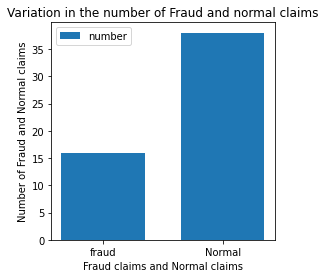

In [813]:
plt.figure(figsize=(4,4))
plt.bar(category,number_of_claims,label="number",width=0.7)
plt.legend()
plt.xlabel("Fraud claims and Normal claims")
plt.ylabel('Number of Fraud and Normal claims')
plt.title("Variation in the number of Fraud and normal claims")
plt.show()

In [814]:
count_m = output.loc[output["GENDER"]== "Male"].count()
count_f = output.loc[output["GENDER"]== "Female"].count()
print("Male claims",count_m[1],"Female claims",count_f[1])

Male claims 28 Female claims 26


In [815]:
fraud_gender = ["Male","Female"]
no_gender = [28, 26]

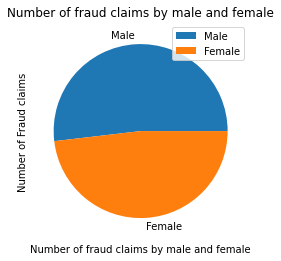

In [816]:
plt.figure(figsize=(6,4))
plt.pie(no_gender,labels =  fraud_gender)
plt.legend()
plt.xlabel("Number of fraud claims by male and female")
plt.ylabel('Number of Fraud claims')
plt.title("Number of fraud claims by male and female")
plt.show()

In [817]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PROVIDER             54 non-null     object
 1   PATIENT_ID           54 non-null     object
 2   DISEASE              54 non-null     int8  
 3   SYMPTOMS             54 non-null     int8  
 4   MEDICATION           54 non-null     int8  
 5   CLAIM_NO             54 non-null     int64 
 6   BILL_AMOUNT          54 non-null     int64 
 7   HEALTH_CARE_CARD_ID  54 non-null     object
 8   GENDER               54 non-null     object
 9   INSURANCE_ID         54 non-null     object
 10  JOIN_DATETIME        54 non-null     object
 11  DISCHARGE_DATETIME   54 non-null     object
 12  CLAIM_DATE           54 non-null     object
 13  CLAIM_AMOUNT         54 non-null     int64 
 14  ADDRESS              54 non-null     int8  
 15  ZIPCODE              54 non-null     int64 
 16  PROFESSION

In [820]:
address = fraud["ADDRESS"].values
count = []
for i in range(16):
    no = fraud.loc[fraud["ADDRESS"]==address[i]].count()
    count.append(no[i])

Text(0.5, 1.0, 'Number of Fraud claims detected are plotted against their addresses')

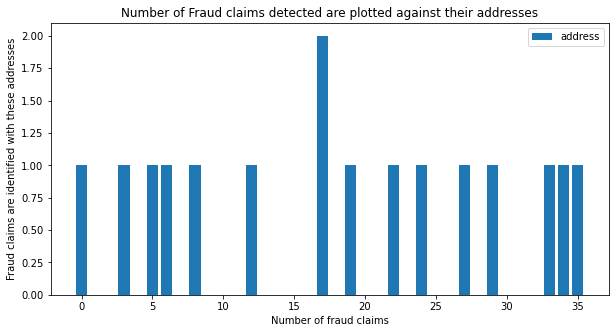

In [861]:
plt.figure(figsize=(10,5))
plt.bar(address,count,label="address",width=0.8)
plt.legend()
plt.xlabel("Number of fraud claims")
plt.ylabel('Fraud claims are identified with these addresses')
plt.title("Number of Fraud claims detected are plotted against their addresses")

In [822]:
payer = fraud["PAYER"].values
payer_count = []
for i in range(16):
    no = fraud.loc[fraud["PAYER"]==payer[i]].count()
    payer_count.append(no[i])
print(payer,payer_count) 

[4 2 3 1 2 1 2 1 4 0 0 0 1 4 1 4] [4, 3, 1, 5, 3, 5, 3, 5, 4, 3, 3, 3, 5, 4, 5, 4]


Text(0.5, 1.0, 'Number of Fraud claims detected are plotted against their payers')

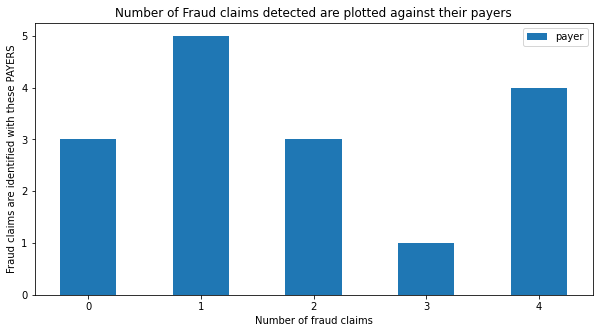

In [823]:

plt.figure(figsize=(10,5))
plt.bar(payer,payer_count,label="payer",width=0.5)
plt.legend()
plt.xlabel("Number of fraud claims")
plt.ylabel('Fraud claims are identified with these PAYERS')
plt.title("Number of Fraud claims detected are plotted against their payers")

In [826]:
provider = fraud["PROVIDER"].values
provider_count = []
for i in range(16):
    no = fraud.loc[fraud["PROVIDER"]==provider[i]].count()
    provider_count.append(no[i])
print(provider,provider_count)  

['XHO121' 'HEALTHY121' 'DHARMA121' 'SWASTH121' 'HEALTHY121' 'SWASTH121'
 'HEALTHY121' 'SWASTH121' 'SSS121' 'ABC121' 'ABC121' 'ABC121' 'SWASTH121'
 'SSS121' 'SWASTH121' 'SSS121'] [1, 3, 1, 5, 3, 5, 3, 5, 3, 3, 3, 3, 5, 3, 5, 3]


Text(0.5, 1.0, 'Number of Fraud claims detected are plotted against their providers')

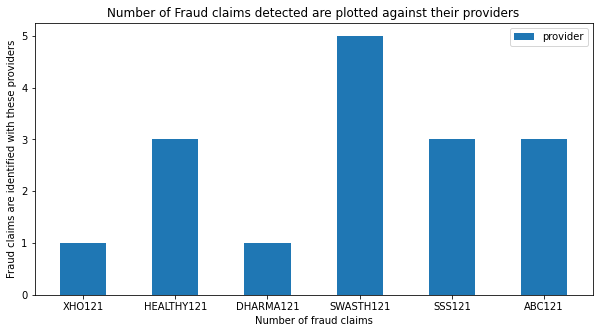

In [827]:
plt.figure(figsize=(10,5))
plt.bar(provider,provider_count,label="provider",width=0.5)
plt.legend()
plt.xlabel("Number of fraud claims")
plt.ylabel('Fraud claims are identified with these providers')
plt.title("Number of Fraud claims detected are plotted against their providers")

In [828]:
physician_id = fraud["PHYSICIAN_ID"].values
physician_count = []
#print(physician_id,physician_count)
for i in range(16):
    no = fraud.loc[fraud["PHYSICIAN_ID"]==physician_id[i]].count()
    physician_count.append(no[i])
print(physician_id,physician_count)

['PKO1' 'PKO1' 'PKO1' 'PKO1' 'VP05' 'RG10' 'VP05' 'PKO1' 'RG10' 'GS07'
 'GS07' 'PKO1' 'PKO1' 'PKO1' 'RG10' 'PKO1'] [9, 9, 9, 9, 2, 3, 2, 9, 3, 2, 2, 9, 9, 9, 3, 9]


Text(0.5, 1.0, 'Number of Fraud claims detected are plotted against their physician')

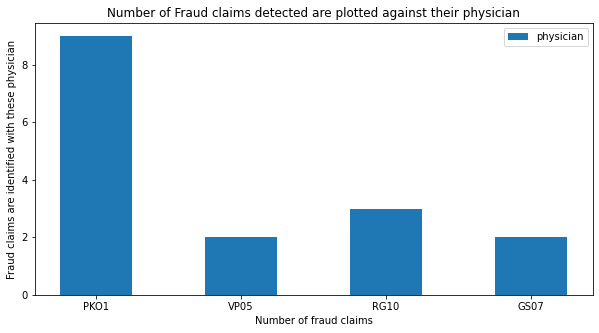

In [829]:
plt.figure(figsize=(10,5))
plt.bar(physician_id,physician_count,label="physician",width=0.5)
plt.legend()
plt.xlabel("Number of fraud claims")
plt.ylabel('Fraud claims are identified with these physician')
plt.title("Number of Fraud claims detected are plotted against their physician")

In [831]:
print(test_data.shape)
print(test_data.describe())

(36, 20)
         DISEASE   SYMPTOMS  MEDICATION  CLAIM_NO   BILL_AMOUNT  CLAIM_AMOUNT  \
count  36.000000  36.000000   36.000000      36.0     36.000000     36.000000   
mean    5.944444   5.416667    2.472222       1.0  24555.555556  28583.333333   
std     3.179797   3.210474    3.175676       0.0  13569.807756  17723.874133   
min     0.000000   0.000000    0.000000       1.0   2000.000000   2000.000000   
25%     4.000000   1.750000    0.000000       1.0   6000.000000   7500.000000   
50%     4.000000   7.000000    1.500000       1.0  30000.000000  30000.000000   
75%    10.000000   7.000000    3.000000       1.0  30000.000000  36250.000000   
max    12.000000  12.000000   11.000000       1.0  50000.000000  70000.000000   

         ADDRESS       ZIPCODE  PROFESSION  CLAIMED_MEDICATION      PAYER  
count  36.000000     36.000000   36.000000           36.000000  36.000000  
mean   15.305556  55367.250000    6.694444            3.388889   2.972222  
std     8.700803   2828.874268   

In [832]:
with PdfPages(r'C:\AI\FRAUD_DETECTION\ML\MODEL_OUTCOMES\CHARTS.pdf') as export_pdf:
    plt.bar(category,number_of_claims,label="number",width=0.7)
    plt.legend()
    plt.title('Variation in the number of Fraud and normal claims')
    plt.xlabel('Fraud claims and Normal claims')
    plt.ylabel('Number of Fraud and Normal claims')
    plt.grid(True)
    export_pdf.savefig()
    plt.close()
      
    plt.pie(no_gender,labels =  fraud_gender)
    plt.legend()
    plt.title('Number of fraud claims by male and female insurance holders')
    plt.xlabel('Number of fraud claims by male and female insurance holders')
    plt.ylabel('Number of Fraud claims')
    plt.grid(True)
    export_pdf.savefig()
    plt.close()
    
    plt.bar(address,count,label="address",width=0.5)
    plt.legend()
    plt.title("Number of Fraud claims detected are plotted against their addresses")
    plt.xlabel("Number of fraud claims")
    plt.ylabel('Fraud claims are identified with these addresses',fontsize=0.2)
    plt.grid(True)
    export_pdf.savefig()
    plt.close()
    
    plt.bar(payer,payer_count,label="payer",width=0.5)
    plt.legend()
    plt.title("Number of Fraud claims detected are plotted against their payers")
    plt.xlabel("Number of fraud claims")
    plt.ylabel('Fraud claims are identified with these PAYERS')
    plt.grid(True)
    export_pdf.savefig()
    plt.close()

    plt.bar(provider,provider_count,label="provider",width=0.5)
    plt.legend()
    plt.title("Number of Fraud claims detected are plotted against their providers")
    plt.xlabel("Number of fraud claims")
    plt.ylabel('Fraud claims are identified with these providers')
    plt.grid(True)
    export_pdf.savefig()
    plt.close()

    plt.bar(physician_id,physician_count,label="physician",width=0.5)
    plt.legend()
    plt.title("Number of Fraud claims detected are plotted against their physician")
    plt.xlabel("Number of fraud claims")
    plt.ylabel('Fraud claims are identified with these physician')
    plt.grid(True)
    export_pdf.savefig()
    plt.close()


In [833]:
output.mean()

DISEASE                   6.629630
SYMPTOMS                  7.129630
MEDICATION                4.685185
CLAIM_NO                  1.055556
BILL_AMOUNT           24888.888889
CLAIM_AMOUNT          29888.888889
ADDRESS                  19.925926
ZIPCODE               55158.388889
PROFESSION                7.203704
CLAIMED_MEDICATION        5.129630
PAYER                     2.759259
DETECT_FRAUD              0.296296
dtype: float64

# <font size="5">STEP 7: CONFIDENCE LEVEL

In [834]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95

In [855]:
data = output[feature_columns]
n = len(data)

In [856]:
m = mean(data)

In [837]:
std_err = sem(data)

In [838]:
h = std_err*t.ppf((1+confidence)/2, n-1)

In [839]:
start = m-h 

In [840]:
print(start)

DISEASE            4.868556
SYMPTOMS           4.330399
MEDICATION         1.397728
BILL_AMOUNT    19964.193170
ADDRESS           12.361627
PROFESSION         5.468298
PAYER              2.504184
dtype: float64


In [841]:
end=m+h
print(end)

DISEASE            7.020333
SYMPTOMS           6.502935
MEDICATION         3.546717
BILL_AMOUNT    29146.917941
ADDRESS           18.249484
PROFESSION         7.920591
PAYER              3.440260
dtype: float64


In [842]:
con_coef = .95

In [843]:
alpha = 1. - con_coef

In [854]:
x_bar = output["DETECT_FRAUD"].mean()
x_bar

0.2962962962962963

In [853]:
sigma = output["DETECT_FRAUD"].std()
sigma

0.46091089588801

In [847]:
import scipy.stats as stats
z_critical = stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [848]:
zinterval = stats.norm.interval(alpha=con_coef)
zinterval

(-1.959963984540054, 1.959963984540054)

In [849]:
standard_error = sigma / math.sqrt(n)
standard_error

0.07681848264800166

In [850]:
CI_lower = x_bar - z_critical * standard_error
CI_upper = x_bar + z_critical * standard_error

In [851]:
CI_lower, CI_upper

(0.14573483695919795, 0.4468577556333946)

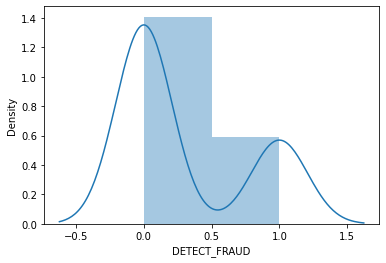

In [852]:
import seaborn as sns
p=sns.distplot(output.DETECT_FRAUD)